<a href="https://colab.research.google.com/github/greyhound101/internship/blob/master/Lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

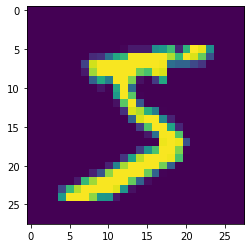

In [0]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
(x_train,y_train),(x_test,y_test)=mnist.load_data()
plt.imshow(x_train[0])

In [0]:
from keras.layers import Dense,Flatten,Dropout
from keras.models import Model 
import keras.backend as K
from keras.utils import to_categorical
print(y_train.shape)
print(x_train.shape)
from keras.layers import Conv2D,Input,MaxPooling2D
x_train=x_train/255
x_test=x_test/255

(60000,)
(60000, 28, 28)


In [0]:
x_trn=[]
x_tst=[]
for i in range(x_train.shape[0]):
  x_trn.append(cv2.resize(x_train[i], (32,32), interpolation = cv2.INTER_AREA))
for i in range(x_test.shape[0]):
  x_tst.append(cv2.resize(x_test[i], (32,32), interpolation = cv2.INTER_AREA))


In [0]:
x_trn=np.asarray(x_trn)
x_tst=np.asarray(x_tst)
x_trn.shape

(60000, 32, 32)

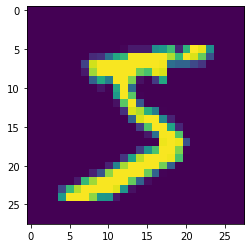

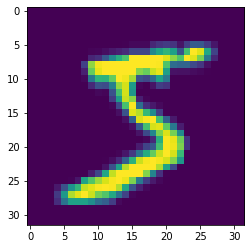

In [0]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_trn[0])
x_trn=x_trn.reshape((x_trn.shape[0],32,32,1))
x_tst=x_tst.reshape((x_tst.shape[0],32,32,1))

In [0]:
from keras.layers import *
inp=Input((32,32,1))
cnv=Conv2D(6,(5,5),input_shape=(32,32,1),activation='tanh')(inp)
mxp=AveragePooling2D(pool_size=(2,2),strides=(2,2))(cnv)
cnv1=Conv2D(16,(5,5),input_shape=(14,14,1),activation='tanh')(mxp)
mxp1=AveragePooling2D(pool_size=(2,2),strides=(2,2))(cnv1)
cnv1=Conv2D(120,(5,5),input_shape=(5,5,1),activation='tanh')(mxp1)
dns=Dense(84,activation='relu')(cnv1)
out=Dense(10,activation='softmax')(dns)
mod=Model(inputs=inp,outputs=out)
mod.compile(loss='categorical_crossentropy',optimizer='adam')

In [0]:
mod.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_14 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_15 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
dense_13 (Dense)             (None, 1, 1, 84)          1016

In [0]:

mod.fit(x_trn,to_categorical(y_train).reshape((60000,1,1,10)),epochs=10,batch_size=200)
pred=mod.predict(x_tst)

Epoch 1/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.3565
Epoch 2/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.1242
Epoch 3/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0862
Epoch 4/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0661
Epoch 5/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0530
Epoch 6/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0431
Epoch 7/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0368
Epoch 8/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0303
Epoch 9/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0258
Epoch 10/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0216


In [0]:
pred=pred.reshape((10000,10))

In [0]:

pred_1=np.argmax(pred,1)
print("validation accuracy is = "+str(accuracy_score(y_test,pred_1)))

validation accuracy is = 0.9858
